In [ ]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2024-07-24 01:11:15--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.02s   

2024-07-24 01:11:15 (2.95 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [ ]:
import pandas as pd

df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.corr(numeric_only=True)

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [ ]:
def calculate_and_sort_correlations(data, target_feature):
    """
    Calculate the correlation of the target_feature to all other features
    and sort them in ascending order.

    Parameters:
    data (pd.DataFrame): The dataset containing the features.
    target_feature (str): The feature to calculate correlations against.

    Returns:
    pd.Series: Correlations of target_feature with other features, sorted in ascending order.
    """
    # Calculate the correlation matrix
    correlation_matrix = data.corr(numeric_only=True)

    # Extract the correlations for the target feature
    correlations = correlation_matrix[target_feature]

    # Drop the target feature itself
    correlations = correlations.drop(target_feature)

    # Sort the correlations in ascending order
    sorted_correlations = correlations.sort_values(ascending=True)

    return sorted_correlations

In [ ]:
calculate_and_sort_correlations(df, 'CO2EMISSIONS')

FUELCONSUMPTION_COMB_MPG   -0.906394
CYLINDERS                   0.849685
FUELCONSUMPTION_HWY         0.861748
ENGINESIZE                  0.874154
FUELCONSUMPTION_COMB        0.892129
FUELCONSUMPTION_CITY        0.898039
MODELYEAR                        NaN
Name: CO2EMISSIONS, dtype: float64

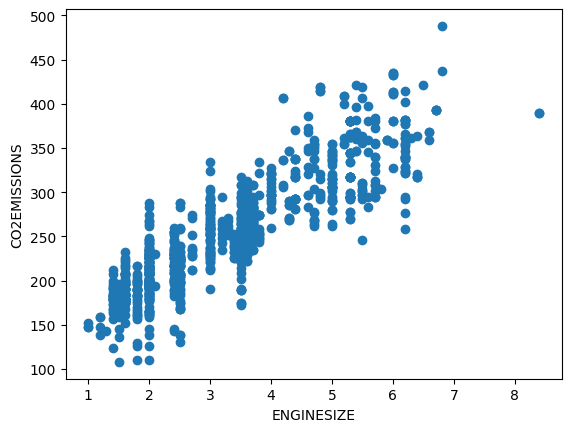

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS)

plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [ ]:
import numpy as np

mask = np.random.rand(len(df)) <0.75
train = df[mask]
test = df[~mask]

**Polynomial Regression**

$$y = b + \theta\_1  x + \theta\_2 x^2$$




In [ ]:
#import

from sklearn import linear_model

from sklearn.preprocessing import PolynomialFeatures

#training the model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)

train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

#the default is degree 2 #the higher the degree the sensitive the distribution of the data
#sensitive mean following the distribution of the data

#predicting model
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly = poly.fit_transform(test_x)

test_y_ = clf.predict(test_x_poly)

#Evaluation

from sklearn.metrics import r2_score

print('The R2 score is:', (r2_score(test_y, test_y_))*100)

print('The MSE is:', np.mean((test_y_ - test_y)**2))

The R2 score is: 74.79650700718237
The MSE is: 973.1823117907353


Text(0, 0.5, 'CO2EMISSIONS')

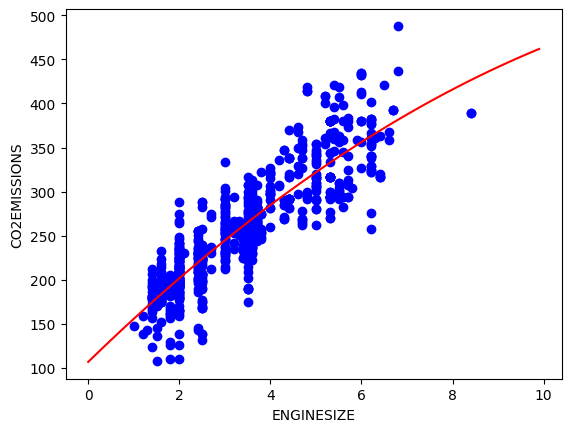

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')

XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)

plt.plot(XX, yy, '-r' )
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")



In [ ]:

poly4 = PolynomialFeatures(degree=4)

train_x_poly4 = poly4.fit_transform(train_x)

clf4 = linear_model.LinearRegression()

train_y_ = clf4.fit(train_x_poly4, train_y)

#the default is degree 2 #the higher the degree the sensitive the distribution of the data
#sensitive mean following the distribution of the data

test_x_poly4 = poly4.fit_transform(test_x)

test_y_ = clf4.predict(test_x_poly4)

#Evaluation

print('The R2 score is:', (r2_score(test_y, test_y_))*100)

print('The MSE is:', np.mean((test_y_ - test_y)**2))

The R2 score is: 74.76530443243108
The MSE is: 974.3871366076337


Text(0, 0.5, 'Emission')

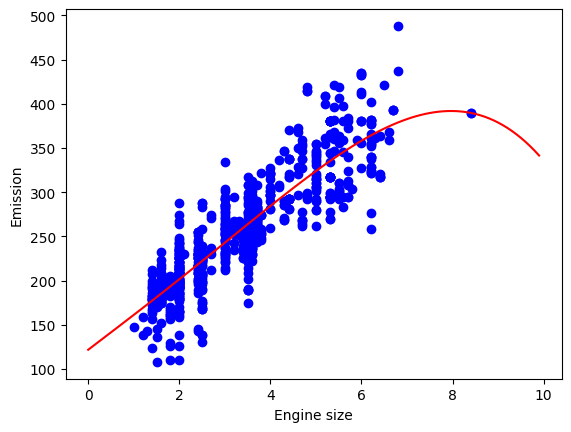

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')

XX = np.arange(0.0, 10.0, 0.1)
yy = clf4.intercept_[0]+ clf4.coef_[0][1]*XX+ clf4.coef_[0][2]*np.power(XX, 2) + clf4.coef_[0][3]*np.power(XX, 3) + clf4.coef_[0][4]*np.power(XX, 4)


#if we have a degree 4, clf4.coef_[0][2]*np.power(XX, 2) you need to add unil you have 4 as shown above
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [ ]:
df.columns


Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [ ]:
#training the model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)

train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

#the default is degree 2 #the higher the degree the sensitive the distribution of the data
#sensitive mean following the distribution of the data

#predicting model
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly = poly.fit_transform(test_x)

test_y_ = clf.predict(test_x_poly)

#Evaluation

print('The R2 score is:', (r2_score(test_y, test_y_))*100)

print('The MSE is:', np.mean((test_y_ - test_y)**2))

The R2 score is: 74.79650700718237
The MSE is: 973.1823117907353


In [ ]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [ ]:
#training the model
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)

train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

#the default is degree 2 #the higher the degree the sensitive the distribution of the data
#sensitive mean following the distribution of the data

#predicting model
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB_MPG', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly = poly.fit_transform(test_x)

test_y_ = clf.predict(test_x_poly)

#Evaluation

print('The R2 score is:', (r2_score(test_y, test_y_))*100)

print('The MSE is:', np.mean((test_y_ - test_y)**2))

The R2 score is: 87.91949283405859
The MSE is: 466.46454500198536


In [ ]:
#training the model
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=3)

train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

#the default is degree 2 #the higher the degree the sensitive the distribution of the data
#sensitive mean following the distribution of the data

#predicting model
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB_MPG', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly = poly.fit_transform(test_x)

test_y_ = clf.predict(test_x_poly)

#Evaluation

print('The R2 score is:', (r2_score(test_y, test_y_))*100)

print('The MSE is:', np.mean((test_y_ - test_y)**2))

The R2 score is: 88.07454204148229
The MSE is: 460.47763095935994


In [ ]:
#training the model
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=4)

train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

#the default is degree 2 #the higher the degree the sensitive the distribution of the data
#sensitive mean following the distribution of the data

#predicting model
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB_MPG', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly = poly.fit_transform(test_x)

test_y_ = clf.predict(test_x_poly)

#Evaluation

print('The R2 score is:', (r2_score(test_y, test_y_))*100)

print('The MSE is:', np.mean((test_y_ - test_y)**2))

The R2 score is: 88.22183854240654
The MSE is: 454.79007212261445


In [ ]:
#training the model
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=5)

train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

#the default is degree 2 #the higher the degree the sensitive the distribution of the data
#sensitive mean following the distribution of the data

#predicting model
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB_MPG', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly = poly.fit_transform(test_x)

test_y_ = clf.predict(test_x_poly)

#Evaluation

print('The R2 score is:', (r2_score(test_y, test_y_))*100)

print('The MSE is:', np.mean((test_y_ - test_y)**2))

The R2 score is: 85.54567091117836
The MSE is: 558.1249155445307


In [ ]:
#training the model
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=6)

train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

#the default is degree 2 #the higher the degree the sensitive the distribution of the data
#sensitive mean following the distribution of the data

#predicting model
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB_MPG', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly = poly.fit_transform(test_x)

test_y_ = clf.predict(test_x_poly)

#Evaluation

print('The R2 score is:', (r2_score(test_y, test_y_))*100)

print('The MSE is:', np.mean((test_y_ - test_y)**2))

The R2 score is: 70.80105365785688
The MSE is: 1127.458726105873


In [ ]:
#training the model
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG', 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)

train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

#the default is degree 2 #the higher the degree the sensitive the distribution of the data
#sensitive mean following the distribution of the data

#predicting model
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB_MPG', 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly = poly.fit_transform(test_x)

test_y_ = clf.predict(test_x_poly)

#Evaluation

print('The R2 score is:', (r2_score(test_y, test_y_))*100)

print('The MSE is:', round((((np.mean((test_y_ - test_y)**2)))*100), 2))

The R2 score is: 90.90144727376192
The MSE is: 35132.24


<Axes: xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

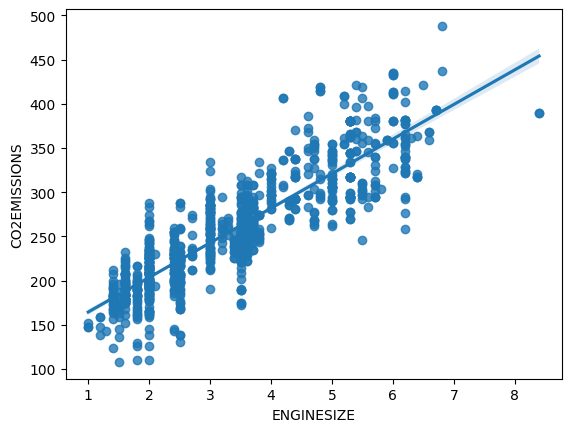

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.regplot(x="ENGINESIZE", y="CO2EMISSIONS", data=df)

Text(0, 0.5, 'CO2EMISSIONS')

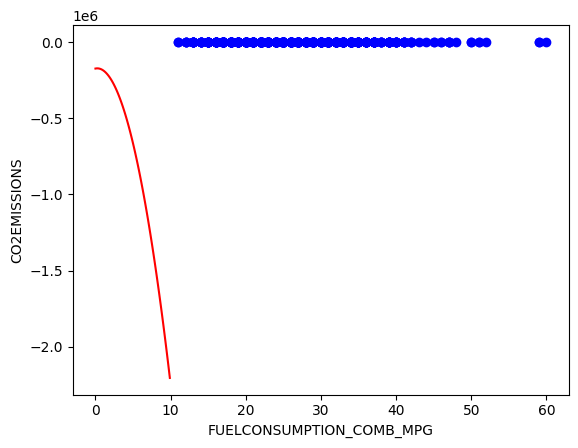

In [ ]:
plt.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS,  color='blue')

XX = np.arange(0.0, 10.0, 0.1)
yy = clf4.intercept_[0]+ clf4.coef_[0][1]*XX+ clf4.coef_[0][2]*np.power(XX, 2)


#if we have a degree 4, clf4.coef_[0][2]*np.power(XX, 2) you need to add unil you have 4 as shown above
plt.plot(XX, yy, '-r' )
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("CO2EMISSIONS")

In [ ]:

poly4 = PolynomialFeatures(degree=4)

train_x_poly4 = poly4.fit_transform(train_x)

clf4 = linear_model.LinearRegression()

train_y_ = clf4.fit(train_x_poly4, train_y)

#the default is degree 2 #the higher the degree the sensitive the distribution of the data
#sensitive mean following the distribution of the data

test_x_poly4 = poly4.fit_transform(test_x)

test_y_ = clf4.predict(test_x_poly4)

#Evaluation

print('The R2 score is:', (r2_score(test_y, test_y_))*100)

print('The MSE is:', np.mean((test_y_ - test_y)**2))

The R2 score is: 94.84960398906998
The MSE is: 198.87220783178887


In [ ]:

poly3 = PolynomialFeatures(degree=3)

train_x_poly3 = poly3.fit_transform(train_x)

clf3 = linear_model.LinearRegression()

train_y_ = clf3.fit(train_x_poly3, train_y)

#the default is degree 2 #the higher the degree the sensitive the distribution of the data
#sensitive mean following the distribution of the data

test_x_poly3 = poly3.fit_transform(test_x)

test_y_ = clf3.predict(test_x_poly3)

#Evaluation

print('The R2 score is:', (r2_score(test_y, test_y_))*100)

print('The MSE is:', np.mean((test_y_ - test_y)**2))

The R2 score is: 93.27633295255426
The MSE is: 259.6209121810669


In [ ]:

poly4 = PolynomialFeatures(degree=4)

train_x_poly4 = poly4.fit_transform(train_x)

clf4 = linear_model.LinearRegression()

train_y_ = clf4.fit(train_x_poly4, train_y)

#the default is degree 2 #the higher the degree the sensitive the distribution of the data
#sensitive mean following the distribution of the data

test_x_poly4 = poly4.fit_transform(test_x)

test_y_ = clf4.predict(test_x_poly4)

#Evaluation

print('The R2 score is:', (r2_score(test_y, test_y_))*100)

print('The MSE is:', np.mean((test_y_ - test_y)**2))

The R2 score is: 94.84960398906998
The MSE is: 198.87220783178887


In [ ]:

poly5 = PolynomialFeatures(degree=5)

train_x_poly5 = poly5.fit_transform(train_x)

clf5 = linear_model.LinearRegression()

train_y_ = clf5.fit(train_x_poly5, train_y)

#the default is degree 2 #the higher the degree the sensitive the distribution of the data
#sensitive mean following the distribution of the data

test_x_poly5 = poly5.fit_transform(test_x)

test_y_ = clf5.predict(test_x_poly5)

#Evaluation

print('The R2 score is:', (r2_score(test_y, test_y_))*100)

print('The MSE is:', np.mean((test_y_ - test_y)**2))

The R2 score is: 83.512302062593
The MSE is: 636.639373733064


In [ ]:

poly6 = PolynomialFeatures(degree=6)

train_x_poly6 = poly6.fit_transform(train_x)

clf6 = linear_model.LinearRegression()

train_y_ = clf6.fit(train_x_poly6, train_y)

#the default is degree 2 #the higher the degree the sensitive the distribution of the data
#sensitive mean following the distribution of the data

test_x_poly6 = poly6.fit_transform(test_x)

test_y_ = clf6.predict(test_x_poly6)

#Evaluation

print('The R2 score is:', (r2_score(test_y, test_y_))*100)

print('The MSE is:', np.mean((test_y_ - test_y)**2))

The R2 score is: -211338.0561131512
The MSE is: 8164256.292069292


In [ ]:

poly7 = PolynomialFeatures(degree=7)

train_x_poly7 = poly7.fit_transform(train_x)

clf7 = linear_model.LinearRegression()

train_y_ = clf7.fit(train_x_poly7, train_y)

#the default is degree 2 #the higher the degree the sensitive the distribution of the data
#sensitive mean following the distribution of the data

test_x_poly7 = poly7.fit_transform(test_x)

test_y_ = clf7.predict(test_x_poly7)

#Evaluation

print('The R2 score is:', (r2_score(test_y, test_y_))*100)

print('The MSE is:', np.mean((test_y_ - test_y)**2))

The R2 score is: -37648527.15250624
The MSE is: 1453726196.5420687


In [ ]:

poly8 = PolynomialFeatures(degree=8)

train_x_poly8 = poly8.fit_transform(train_x)

clf8 = linear_model.LinearRegression()

train_y_ = clf8.fit(train_x_poly8, train_y)

#the default is degree 2 #the higher the degree the sensitive the distribution of the data
#sensitive mean following the distribution of the data

test_x_poly8 = poly8.fit_transform(test_x)

test_y_ = clf8.predict(test_x_poly8)

#Evaluation

print('The R2 score is:', (r2_score(test_y, test_y_))*100)

print('The MSE is:', np.mean((test_y_ - test_y)**2))

The R2 score is: -247716238.62035424
The MSE is: 9565069379.69244


Text(0, 0.5, 'CO2EMISSIONS')

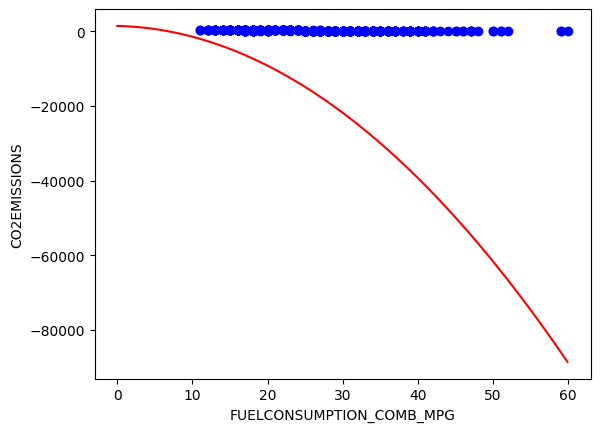

In [ ]:
plt.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS,  color='blue')

XX = np.arange(0.0, 60.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)


#if we have a degree 4, clf4.coef_[0][2]*np.power(XX, 2) you need to add unil you have 4 as shown above
plt.plot(XX, yy, '-r' )
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("CO2EMISSIONS")

Text(0, 0.5, 'CO2EMISSIONS')

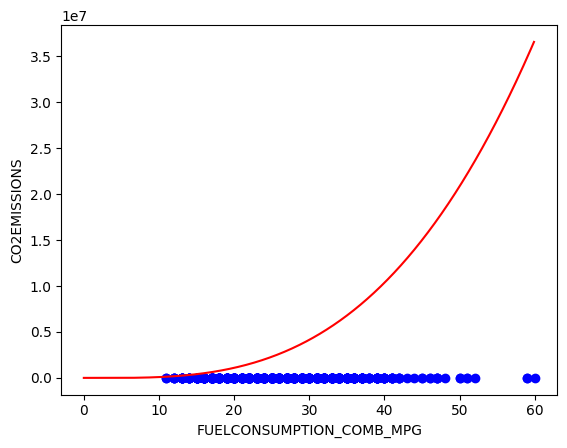

In [ ]:
plt.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS,  color='blue')

XX = np.arange(0.0, 60.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)


#if we have a degree 4, clf4.coef_[0][2]*np.power(XX, 2) you need to add unil you have 4 as shown above
plt.plot(XX, yy, '-r' )
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("CO2EMISSIONS")

Text(0, 0.5, 'CO2EMISSIONS')

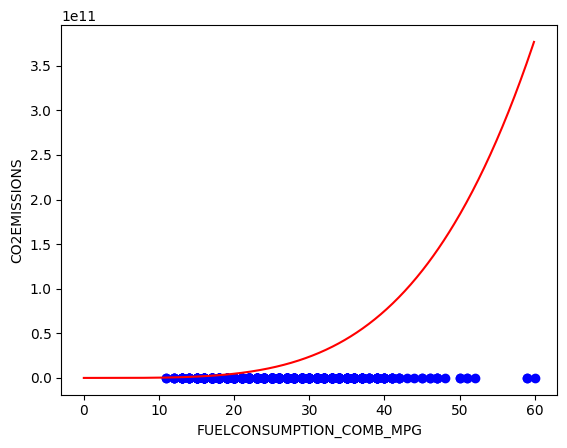

In [ ]:
plt.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS,  color='blue')

XX = np.arange(0.0, 60.0, 0.1)
yy = clf4.intercept_[0]+ clf4.coef_[0][1]*XX + clf4.coef_[0][2]*np.power(XX, 2) + clf4.coef_[0][3]*np.power(XX, 3) + clf4.coef_[0][4]*np.power(XX, 4)


#if we have a degree 4, clf4.coef_[0][2]*np.power(XX, 2) you need to add unil you have 4 as shown above
plt.plot(XX, yy, '-r' )
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("CO2EMISSIONS")

Text(0, 0.5, 'CO2EMISSIONS')

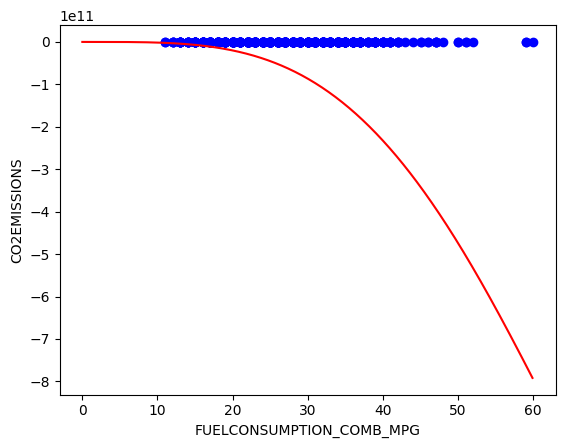

In [ ]:
plt.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS,  color='blue')

XX = np.arange(0.0, 60.0, 0.1)
yy = clf5.intercept_[0]+ clf5.coef_[0][1]*XX + clf5.coef_[0][2]*np.power(XX, 2) + clf5.coef_[0][3]*np.power(XX, 3) + clf5.coef_[0][4]*np.power(XX, 4) + clf5.coef_[0][5]*np.power(XX, 5)


#if we have a degree 4, clf4.coef_[0][2]*np.power(XX, 2) you need to add unil you have 4 as shown above
plt.plot(XX, yy, '-r' )
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("CO2EMISSIONS")

Text(0, 0.5, 'CO2EMISSIONS')

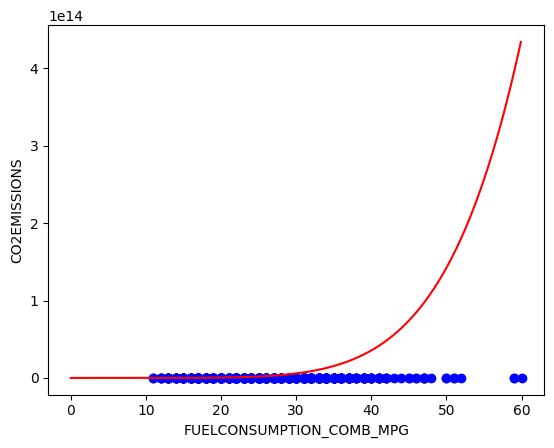

In [ ]:
plt.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS,  color='blue')

XX = np.arange(0.0, 60.0, 0.1)
yy = clf6.intercept_[0]+ clf6.coef_[0][1]*XX + clf6.coef_[0][2]*np.power(XX, 2) + clf6.coef_[0][3]*np.power(XX, 3) + clf6.coef_[0][4]*np.power(XX, 4) + clf6.coef_[0][5]*np.power(XX, 5) + clf6.coef_[0][6]*np.power(XX, 6)


#if we have a degree 4, clf4.coef_[0][2]*np.power(XX, 2) you need to add unil you have 4 as shown above
plt.plot(XX, yy, '-r' )
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("CO2EMISSIONS")

In [ ]:
poly = PolynomialFeatures(degree=2)

train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

#the default is degree 2 #the higher the degree the sensitive the distribution of the data
#sensitive mean following the distribution of the data

test_x_poly = poly.fit_transform(test_x)

test_y_ = clf.predict(test_x_poly)

#Evaluation

print('The R2 score is:', (r2_score(test_y, test_y_))*100)

print('The MSE is:', np.mean((test_y_ - test_y)**2))

The R2 score is: 90.90144727376192
The MSE is: 351.32235752376073
